In [22]:
from unidecode import unidecode
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
imgdir = '/'.join(os.getcwd().split('/')[:-1] + ['static', 'img_all'])
imgdir

'/media/frek/Storage1/projects/museo_solidaridad/static/img_all'

In [60]:
def create_df_imgs(imgdir):
    df_imgs = pd.DataFrame()
    imgs = {}
    counter = 0
    for dirpath, dirnames, filenames in os.walk(imgdir):
        for file in [f for f in filenames if f.split('.')[-1] in ['jpg', 'jpeg', 'png']]:
            img = Image.open(os.path.join(dirpath, file))
            df_imgs.loc[counter, 'folder'] = dirpath.split('/')[-1]
            df_imgs.loc[counter, 'file'] = file
            df_imgs.loc[counter, 'size(kB)'] = os.path.getsize(os.path.join(dirpath, file))/1000
            df_imgs.loc[counter, 'height'] = img.height
            df_imgs.loc[counter, 'width'] = img.width
            df_imgs.loc[counter, 'surface'] = img.height * img.width
            imgs[counter] = img
            counter += 1
    return df_imgs

In [61]:
df_imgs = create_df_imgs(imgdir)

In [62]:
df_imgs['size(kB)'].sum()/1000

372.20007

In [32]:
## generate new name
df_imgs['new_name'] = df_imgs['file'].apply(lambda x: unidecode(x.lower().replace(' ', '_')))

In [34]:
df_imgs.sort_values('surface', ascending=False).head(10)

,folder,file,size(kB),height,width,surface,new_name
151,FOTOS,foto grupo avignon.jpg,5014.976,3422.0,6565.0,22465430.0,foto_grupo_avignon.jpg
129,FOTOS,foto grupo avignon_1.jpg,5653.285,3422.0,6565.0,22465430.0,foto_grupo_avignon_1.jpg
80,PRENSA,Las Provincias_15 sep 1978.jpg,2814.511,5202.0,3465.0,18024930.0,las_provincias_15_sep_1978.jpg
0,OBRAS,IMG_2351.jpg,11865.573,3456.0,5184.0,17915904.0,img_2351.jpg
22,OBRAS,IMG_2350.jpg,13526.584,3456.0,5184.0,17915904.0,img_2350.jpg
36,OBRAS,IMG_2352.jpg,11438.164,3456.0,5184.0,17915904.0,img_2352.jpg
33,OBRAS,IMG_2348.jpg,14425.000,3456.0,5184.0,17915904.0,img_2348.jpg
27,OBRAS,IMG_2349.jpg,11823.576,3456.0,5184.0,17915904.0,img_2349.jpg
86,PRENSA,UNESCO CUBA_MIRSA 2_1977.jpg,2921.962,5012.0,3465.0,17366580.0,unesco_cuba_mirsa_2_1977.jpg
130,FOTOS,IMG_3269.jpg,18128.911,3465.0,4822.0,16708230.0,img_3269.jpg


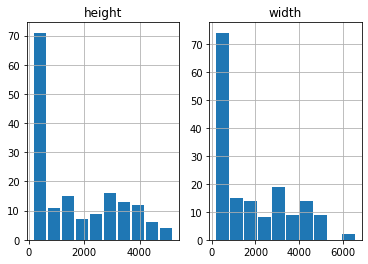

In [26]:
for counter, dim in enumerate(['height', 'width']):
    plt.subplot(1, 2, counter+1)
    df_imgs[dim].hist(rwidth=0.9)
    plt.title(dim)
    

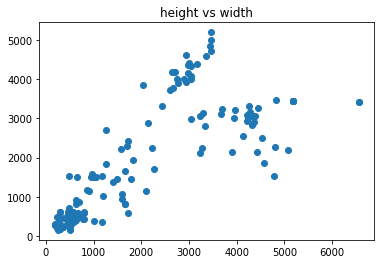

In [30]:
plt.scatter(x=df_imgs['width'], y=df_imgs['height'])
plt.title('height vs width')
plt.show()

## Creation of df imgs new

In [56]:
max_size = 3000
imgout = '/'.join(imgdir.split('/')[:-1]+['img_new'])
os.system('rm -R {imgout}'.format(imgout=imgout))
os.system('mkdir {imgout}'.format(imgout=imgout))
for counter in df_imgs.index:
    filedir = imgout + '/' + df_imgs.loc[counter, 'folder'].lower()
    os.system('mkdir '+filedir)
    imgs[counter].thumbnail(size=(max_size, max_size))
    imgs[counter].save(filedir+'/'+df_imgs.loc[counter, 'new_name'])

In [66]:
df_imgs2 = create_df_imgs(imgout)
print(df_imgs2.shape)
df_imgs2.head()

(164, 6)


,folder,file,size(kB),height,width,surface
0,fotos,diapo_suecia.jpg,707.426,1425.0,3000.0,4275000.0
1,fotos,obras_museo_allende_lodz_13_1978.jpg,18.741,265.0,500.0,132500.0
2,fotos,mario_pedrosa_y_allende_1972_mssa.jpg,17.666,209.0,300.0,62700.0
3,fotos,cortazar_museo_allende_lodz_3_1978.jpg,36.248,364.0,500.0,182000.0
4,fotos,grupo_museo_de_la_resistencia_1977_avignon_2.jpg,59.421,480.0,720.0,345600.0


In [67]:
df_imgs2['size(kB)'].sum()/1000

60.350770000000004

In [68]:
df_imgs2.sort_values('surface', ascending=False).to_csv(os.getcwd()+'/df_imgs2.csv')

In [37]:
for folder in[f for f in  os.listdir(imgdir) if '.' not in f]:
    folder_corr = unidecode(folder).replace(' ', '_').lower()
    if folder not in os.listdir(tmbdir):
        os.system('mkdir '+tmbdir+folder_corr)
    for file in [f for f in os.listdir(imgdir+folder) if 'jpg' in f]:
        file_corr = unidecode(file).replace(' ','_').lower()
        im = Image.open(imgdir+folder+'/'+file)
        im.thumbnail(size)
        im.save(tmbdir+folder_corr+'/'+file_corr)

In [47]:
img_new_size = 400,400
for folder in os.listdir(imgdir):
    folder_corr = unidecode(folder).replace(' ', '_').lower()
    print(folder_corr)
    if folder_corr not in os.listdir(imgnewdir):
        os.system('mkdir '+imgnewdir+folder_corr)
    for file in [f for f in os.listdir(imgdir+folder) if 'jpg' in f]:
        file_corr = unidecode(file).replace(' ','_').lower()
        os.system('cp "'+imgdir+folder+'/'+file+'" '+imgnewdir+folder_corr+'/'+file_corr)    
        im = Image.open(imgdir+folder+'/'+file)
        im.thumbnail(img_new_size)
        im.save(imgnewdir+folder_corr+'/'+file_corr)

obras_1
grafica
prensa
cartel
fotos
obras


In [ ]:
for folder in os.listdir(imgdir):
    folder_corr = unidecode(folder).replace(' ', '_').lower()
    print(folder_corr)
    if folder_corr not in os.listdir(imgnewdir):
        os.system('mkdir '+imgnewdir+folder_corr)
    for file in [f for f in os.listdir(imgdir+folder) if 'jpg' in f]:
        file_corr = unidecode(file).replace(' ','_').lower()
        os.system('cp "'+imgdir+folder+'/'+file+'" '+imgnewdir+folder_corr+'/'+file_corr)    
        im = Image.open(imgdir+folder+'/'+file)
        im.thumbnail(img_new_size)
        im.save(imgnewdir+folder_corr+'/'+file_corr)

In [61]:
for folder in os.listdir(imgdir):
    folder_corr = unidecode(folder).replace(' ', '_').lower()
    if folder_corr not in os.listdir(imgnewdir2):
        os.system('mkdir '+imgnewdir2+folder_corr)
    for file in [f for f in os.listdir(imgdir+folder) if 'jpg' in f]:
        file_corr = unidecode(file).replace(' ','_').lower()
        os.system('cp "'+imgdir+folder+'/'+file+'" '+imgnewdir2+folder_corr+'/'+file_corr)    

In [116]:
imgnewdir2

'/media/frek/Storage/projects/pulp/static/img_new2/'

In [120]:
os.system('mkdir '+imgnewdir2)
for folder in os.listdir(imgnewdir2):
    if folder not in os.listdir(imgnewdir3):
        os.system('mkdir '+imgnewdir3+folder)
    for file in [f for f in os.listdir(imgnewdir2+folder) if 'jpg' in f]:
        im = Image.open(imgnewdir2+folder+'/'+file)
        im.thumbnail((800,800))
        im.save(imgnewdir3+folder+'/'+file)

In [121]:
imgnewdir3

'/media/frek/Storage/projects/pulp/static/img_new2/'

In [50]:
im.height

400

In [51]:
im.width

398

In [53]:
im = Image.open(imgnewdir+'fotos/obras_museo_allende_lodz_13_1978.jpg')

In [54]:
im.height

212

In [55]:
im.width

400